<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1>
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1>

# Atividade: T4 - Atividade de aprofundamento

Nome: Bruno Rebocho de Toledo

Turma: 01B

Matrícula: 92316328

---
## Introdução

Este notebook tem como objetivo explorar as capacidades de classificação de redes neurais com TensorFlow e Keras.

---
## Dataset "Predict students' dropout and academic success"[1]

O conjunto de dados escolhido, criado a partir de uma instituição de ensino superior (adquirido de várias bases de dados independentes), descreve estudantes matriculados em diferentes graduações, como agronomia, design, educação, enfermagem, jornalismo, gestão, serviço social e tecnologias. O conjunto de dados inclui informações conhecidas no momento da matrícula do estudante (trajetória acadêmica, demografia e fatores socioeconômicos) e o desempenho acadêmico dos alunos ao final do primeiro e segundo semestres. Os dados são usados para construir modelos de classificação para prever a evasão e o sucesso acadêmico.

---
## O Problema

O problema é formulado como uma tarefa de classificação binária indicando a conclusão ou desistência do curso, na qual existe um forte desequilíbrio em favor de uma das classes originais.

---
## Explorando os Dados

Inicialmente, começamos explorando os dados ao importar as bibliotecas `numpy` e `pandas`. Utilizamos o `pandas` para ler o arquivo 'data.csv', especificando o ponto e vírgula como delimitador.

Após a leitura do arquivo, exibimos as primeiras cinco linhas do DataFrame `df` com a função `head()`. Esta visualização inicial nos fornece uma visão rápida de como os dados estão estruturados, incluindo nomes de colunas e tipos de dados, o que é crucial para o planejamento das etapas seguintes de análise.

Em seguida, imprimimos a dimensão do DataFrame com `df.shape`, revelando o número total de linhas e colunas. Esta informação é fundamental para entender o volume e a complexidade dos dados com os quais estamos trabalhando, orientando as decisões sobre o processamento e a análise subsequente.

Por vim, verificamos a presença de nulos ou valores ausentes, o que não é o caso deste nosso conjunto de dados.

In [ ]:
import numpy as np
import pandas as pd

!wget -O data.csv 'https://drive.google.com/uc?export=download&id=1hnHg7IN3qTPnIui2XrkT5hUd9XFH8Ecn'

df = pd.read_csv('data.csv', delimiter=';')

display(df.head())

print(df.shape)

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

#### Avaliando a Distribuição da Coluna Alvo

Prosseguindo com a exploração dos dados, focamos na coluna 'Target', que desempenha um papel crucial na nossa análise. Para entender melhor a distribuição dos valores nesta coluna, utilizamos o método `value_counts()` do Pandas. Este método nos retorna rapidamente um panorama da frequência de cada valor único na coluna 'Target'.

Ao realizar esta operação, estamos buscando informações sobre a distribuição das classes ou categorias representadas na coluna 'Target'. Esta informação é vital, pois uma distribuição desigual das classes pode influenciar significativamente o desempenho do modelo.

Assim, ao imprimir o resultado de `value_counts()`, estabelecemos uma base para compreender como os dados estão estruturados em relação à variável que pretendemos prever.

Como esperado, há um forte desbalanceamento entre os valores.

In [ ]:
print(df['Target'].value_counts())

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


---
## Preparação dos Dados para Modelagem

Com o objetivo de adaptar nosso conjunto de dados para um problema de classificação binária, fizemos ajustes focando nas categorias 'Graduate' e 'Dropout'. Criamos a nova coluna 'Dropout' no DataFrame, codificando 'Graduate' como 0 e 'Dropout' como 1, que será nossa variável dependente. Eliminamos a categoria 'Enrolled', o que também contribui para reduzir o desbalanceamento inicial das classes.

Com a nova organização dos dados, removemos a coluna 'Target', pois ela já foi codificada em 'Dropout'. Em seguida, separamos o DataFrame em variáveis independentes `X` e a variável dependente `y`, que agora reflete com precisão o nosso problema binário de prever se um aluno irá se formar ou desistir.

In [ ]:
df = df[df['Target'].isin(['Graduate', 'Dropout'])]

df['Dropout'] = [0 if typ == 'Graduate' else 1 for typ in df['Target']]

df.drop('Target', axis=1, inplace=True)

X = df.drop('Dropout', axis=1)

y = df['Dropout']

<ipython-input-16-a72d87fe9a91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dropout'] = [0 if typ == 'Graduate' else 1 for typ in df['Target']]
<ipython-input-16-a72d87fe9a91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Target', axis=1, inplace=True)


---
## Separando os Dados em Treinamento e Teste

Agora avançamos para  a divisão do conjunto de dados em partes para treinamento e teste. Ao definirmos o parâmetro `test_size` como 0.3, estamos especificando que 30% do conjunto de dados será reservado para teste e 70% para treinar o modelo, conforme solicitado.

Após a aplicação da `train_test_split`, obtemos quatro conjuntos de dados: `X_train` e `y_train`, utilizados para treinamento, e `X_test` e `y_test`, que servirão para testar o modelo após o treinamento.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

---
## Normalizando os Dados

Iniciamos este processo utilizando o método `describe()` do DataFrame, que fornece um resumo estatístico, como média, desvio padrão, valores mínimos e máximos. Esta visão permite identificar a necessidade de normalização.

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.391460
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


---
## Redução de Dimensionalidade e Pipeline de Pré-processamento

Neste estágio, aprimoramos o pré-processamento de dados incorporando a Análise de Componentes Principais (PCA). Começamos inicialmente com a importação e configuração do PCA da biblioteca `sklearn.decomposition`, definindo-o para reter 80% da variância dos dados.

No conjunto de treinamento (`X_train`), usamos o método `fit_transform` para ajustar o pipeline aos dados e, simultaneamente, transformá-los. O resultado dessa transformação é armazenado em `X_train_pca`. Para o conjunto de teste (`X_test`), empregamos o método `transform` para aplicar as mesmas transformações com os parâmetros ajustados durante o treinamento. Isso resulta em `X_test_pca`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

pca = PCA(n_components=0.8)

pipeline = make_pipeline(scaler, pca)

X_train_pca = pipeline.fit_transform(X_train)

X_test_pca = pipeline.transform(X_test)

---
## Definindo o Modelo de Rede Neural

Determinamos o número de características de entrada (`shape`) com base na forma do conjunto de dados de teste processado pelo PCA (`X_test_pca`). Esse número guia a configuração da primeira camada da rede.

O modelo é construído como uma sequência de camadas, cada uma com a função de ativação `relu`, exceto a última camada que utiliza `sigmoid`. A primeira camada recebe `shape` neurônios, correspondendo ao número de características de entrada. A segunda camada tem metade do número de neurônios da primeira, seguindo uma estrutura que gradualmente condensa a informação. A última camada, com um único neurônio e ativação `sigmoid`, é adequada para uma tarefa de classificação binária, produzindo uma saída entre 0 e 1.

Após a definição do modelo, invocamos `model.summary()` para exibir um resumo da arquitetura da rede. Observamos que o modelo consiste em três camadas, com um total de 417 parâmetros.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

shape = X_test_pca.shape[1]

model = keras.Sequential([
    layers.Dense(shape, activation='relu', input_shape=[shape]),
    layers.Dense(shape / 2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
## Compilando o Modelo de Rede Neural

Escolhemos 'binary_crossentropy' como a função de perda e definimos 'binary_accuracy' como a métrica para avaliar o modelo.

In [ ]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

---
## Treinamento do Modelo com Early Stopping

Utilizamos a técnica de early stopping para melhorar a eficiência e prevenir o overfitting.

Configuramos este callback para iniciar a avaliação da necessidade de parada após 10 épocas (`start_from_epoch=10`), com uma paciência de 10 épocas adicionais (`patience=10`). O parâmetro `restore_best_weights=True` garante que o modelo retorne aos pesos da época em que teve o melhor desempenho após a parada do treinamento.

Passamos `X_train_pca` e `y_train` como os dados de treinamento, com um `batch_size` de 32. Utilizamos uma divisão de validação de 30% (`validation_split=0.3`) para avaliar o desempenho do modelo. O modelo é treinado para um máximo de 100 épocas (`epochs=100`), mas com a parada antecipada, podemos observar que o treinamento terminou antes deste limite.

Ao final do treinamento, o histórico é armazenado em `history`. Este histórico contém informações valiosas sobre a evolução da função de perda e das métricas de avaliação ao longo das épocas, permitindo a análise posterior do desempenho do modelo.

In [ ]:
from tensorflow import keras

early_stopping = keras.callbacks.EarlyStopping(
    start_from_epoch=10,
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_pca,
    y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/100
56/56 [==============================] - 2s 8ms/step - loss: 0.6694 - binary_accuracy: 0.6069 - val_loss: 0.5802 - val_binary_accuracy: 0.7221
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5423 - binary_accuracy: 0.7463 - val_loss: 0.4670 - val_binary_accuracy: 0.7955
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4583 - binary_accuracy: 0.7975 - val_loss: 0.3977 - val_binary_accuracy: 0.8309
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4050 - binary_accuracy: 0.8273 - val_loss: 0.3531 - val_binary_accuracy: 0.8519
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3723 - binary_accuracy: 0.8436 - val_loss: 0.3261 - val_binary_accuracy: 0.8689
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3499 - binary_accuracy: 0.8571 - val_loss: 0.3087 - val_binary_accuracy: 0.8807
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - los

---
## Curva de Aprendizado e Avaliação do Desempenho do Modelo

Depois o treinamento, transformamos o histórico m um DataFrame para análise.

Os gráficos apresentam a evolução da perda e da acurácia ao longo das épocas. Observamos que a perda no conjunto de validação diminui de forma consistente ao longo do tempo, o que indica que o modelo está aprendendo efetivamente e melhorando a sua capacidade de generalização. Além disso, a acurácia binária no conjunto de validação aumenta e parece estabilizar, sugerindo que o modelo não está apenas memorizando os dados de treinamento, mas também se tornando eficaz em prever resultados em dados não vistos.

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.669416,0.606862,0.580225,0.722149
1,0.542319,0.746344,0.467011,0.795544
2,0.458302,0.797525,0.397734,0.830931
3,0.404991,0.827334,0.353071,0.851900
4,0.372302,0.843645,0.326148,0.868938


Best Validation Loss: 0.2394
Best Validation Accuracy: 0.9187


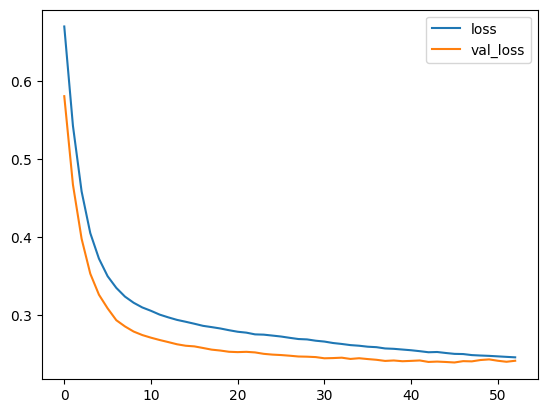

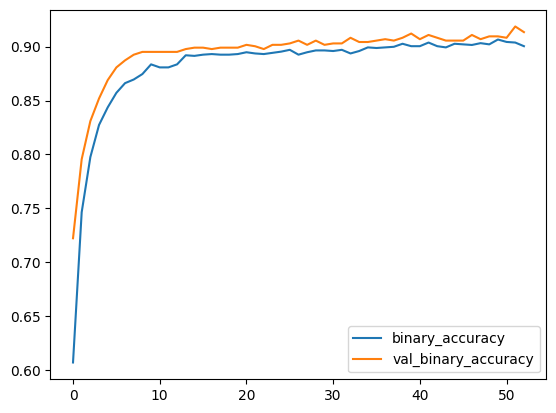

In [ ]:
history_df = pd.DataFrame(history.history)
display(history_df.head())
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
  "\nBest Validation Accuracy: {:0.4f}")\
  .format(history_df['val_loss'].min(),
          history_df['val_binary_accuracy'].max()))

---
## Avaliação Final do Modelo

Concluído o treinamento do modelo de rede neural, procedemos à sua avaliação usando o conjunto de teste transformado pela PCA (`X_test_pca`). A predição do modelo é feita através do método `predict`, e um threshold de 0.5 é aplicado para determinar a classificação binária: valores iguais ou acima de 0.5 são considerados classe 1 (Dropout) e abaixo são classe 0 (Graduate).

A matriz de confusão revelada indica que o modelo teve um desempenho razoavelmente bom ao identificar as duas classes, com um número maior de verdadeiros positivos e verdadeiros negativos do que de falsos positivos e falsos negativos.

Em seguida, apresentamos o relatório de classificação, que oferece uma visão detalhada do desempenho do modelo, incluindo métricas como precisão, recall e pontuação f1 para cada classe. O relatório mostra que o modelo tem uma precisão e um recall balanceados para ambas as classes, resultando em uma boa pontuação f1.

Por último, calculamos a acurácia geral do modelo, que nos informa a proporção de previsões corretas sobre o total de previsões. Com uma acurácia de aproximadamente 88%, podemos concluir que o modelo é bastante eficaz.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = model.predict(X_test_pca) >= 0.5

print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print('Acuracidade: ' , accuracy_score(y_test, y_pred))

35/35 [==============================] - 0s 1ms/step
Matriz de Confusão: 
 [[636  46]
 [ 86 321]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       682
           1       0.87      0.79      0.83       407

    accuracy                           0.88      1089
   macro avg       0.88      0.86      0.87      1089
weighted avg       0.88      0.88      0.88      1089

Acuracidade:  0.8787878787878788


---
## Conclusões

Ao finalizar a análise e modelagem do conjunto de dados, concluímos que as redes neurais, com o uso do TensorFlow e Keras, demonstraram ser ferramentas eficazes para prever a evasão e o sucesso acadêmico de estudantes.

A aplicação de técnicas como normalização, PCA e early stopping contribuíram significativamente para a eficácia do modelo.

A precisão alcançada, em torno de 87%, sugere que o modelo pode ser uma ferramenta valiosa para identificar estudantes em risco, permitindo intervenções proativas para melhorar a retenção e o sucesso acadêmico.

---
## Referências

1. University of California, Irvine. Predict Student's Dropout and Academic Success. UCI Machine Learning Repository. Disponível em: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success. Acesso em: 23 nov.2023.

2. BETTER-DATA-SCIENCE. TensorFlow Classification. 2023. Software. Disponível em: https://github.com/better-data-science/TensorFlow/blob/main/003_TensorFlow_Classification.ipynb. Acesso em: 22 nov.2023.